
\newpage

In [1]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt

from utils.GA import GA
from utils.GA import Model as ModelGA
import numpy as np
from utils.ES import ES
from utils.ES import Model as ModelES

import time

# Resolução do Ítem (d)



### Evolução Diferencial

In [2]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=100,
    cr=0.9, 
    f=0.8, 
    evfunc='Colville', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100


Para a minimização da função de Colville, os parâmetros utilizados para o algorítmo de Evolução Diferencial cosistiram em:
    * Número de Gerações: 100
    * Tamanho da População: 100
    * Taxa de Cruzamento: 0.9
    * Fator de Escala: 0.8
O algorítmo de mutação empregado consistiu no DE/best/1/bin e o critério de parada do algoritmo consiste no número de gerações.

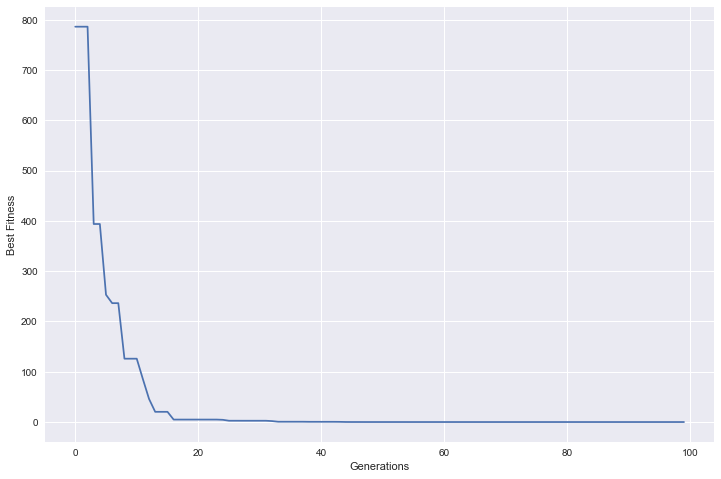

In [3]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


O gráfico acima destaca o processo de convergência das soluções candidatas para a solução ótima. Percebe-se que o algorítmo converge para a solução ótima em menos de 20 gerações.


In [4]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 1.25941144589378e-05	Q1: 0.0006600353835389426	Q2: 0.026536382782612472	Q3: 3.0594946044872673	Max: 1.5413219222476387e-05
45.13299453916417


Em torno de 50% das soluções candidatas durante a execução do algoritmo obtiveram o fitness entre 1.25941144589378e-05 e 3.059.


A seguir, será realizada a execução do algoritmo de Evolução Diferencial 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [5]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=50,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Griewank', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 50

In [6]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 4.117714735851763e-09
Variance: 4.59600536203744e-17
Standard Deviation: 6.779384457336404e-09


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 4.117714735851763e-09 e o desvio padrão  6.779384457336404e-09.

In [7]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.882537857691447
Variance: 0.013276730643079998
Standard Deviation: 0.11522469632452931


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 0.88 e desvio padrão de 0.115.

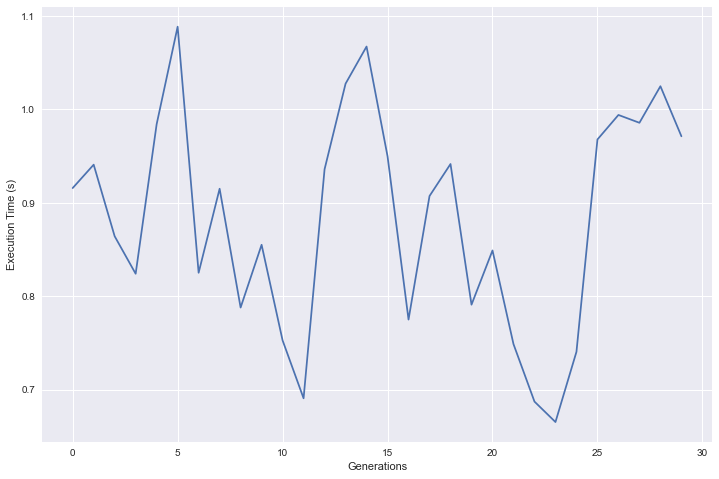

In [8]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Evolução Diferencial em cada uma das 30 iterações.

### Algorítmos de Estimação de Distribuição

In [31]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Colville'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Estimação de Distribuição  GA Compacto cosistiram em:
    * Número de Gerações: 100
    * Tamanho da População: 50
    * Probabilidade Mínima: 0.04
    * Probabilidade Máxima: 0.93
    * Taxa de Aprendizado: 0.03
    

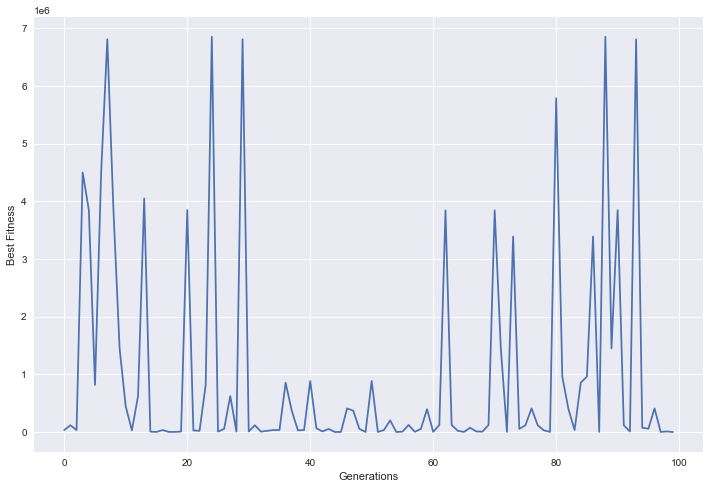

In [32]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima apresenta o fitness da melhor solução em cada geração.

In [33]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 894.2909999999999	Q1: 10554.800000000001	Q2: 70271.3	Q3: 855171.6	Max: 1962.4
1010499.3500000003


Cerca de 50% das melhores soluções candidatas obtveram um valor do fitness entre 10554.80 e 855171.6.

A seguir, será realizada a execução do algoritmo de Estimação de Distribuição GA Compacto 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [34]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=50, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Colville'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [35]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 127.66333333333334
Variance: 38107.19965555554
Standard Deviation: 195.21065456464086


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de  127.66 e o desvio padrão 195.21.

In [36]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.0141525268554688
Variance: 0.02547168312830763
Standard Deviation: 0.15959850603407172


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 2.01 e desvio padrão de 0.159.

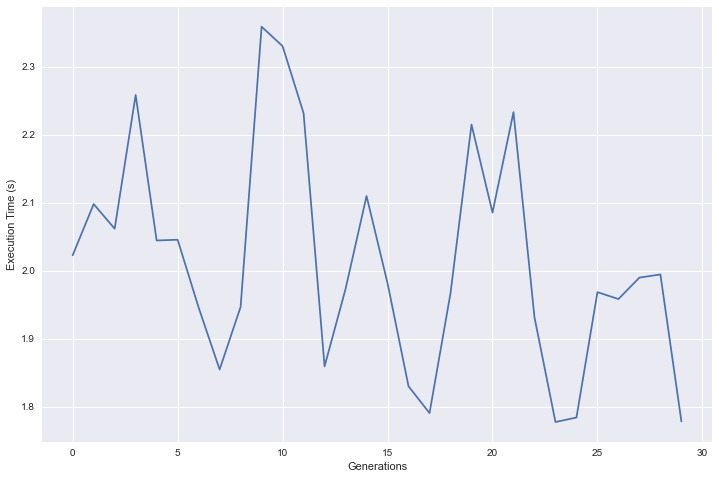

In [37]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Estimação de Distribuição GA Compacto em cada uma das 30 iterações.

## Algoritmo Genético

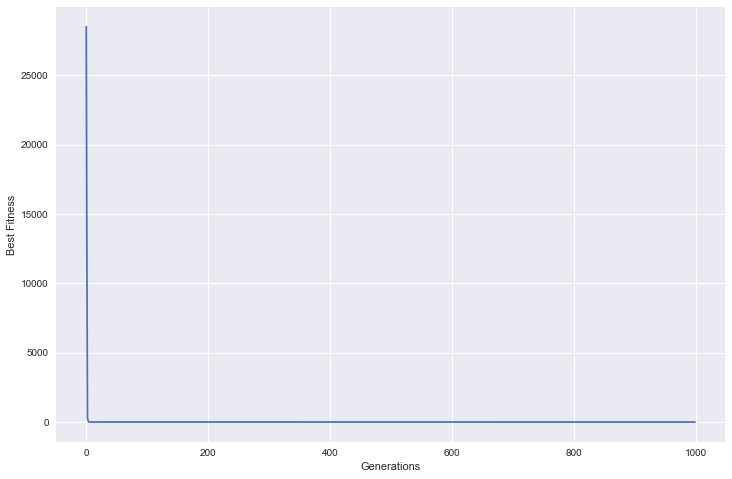

In [16]:
UB = 32
LB = -32
GENERATIONS = 1000
pop = np.random.uniform(low=LB, high=UB, size=(300,4))
    
model = ModelGA(
    pop,
    Colville().compute, 
    "whole arithmetic recombination best", 
    "uniform mutation",
    "fitness proportional selection kbest",
    "fitness proportional selection kbest",
    0.1,
    GENERATIONS,
    UB,
    LB,
    0,
    alpha=0.8
)
    
ga_alg = GA(model)
ga_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)### Evolução Diferencial
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [17]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [18]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.4563857643542324
Variance: 0.003863263762337132
Standard Deviation: 0.06215515877493301


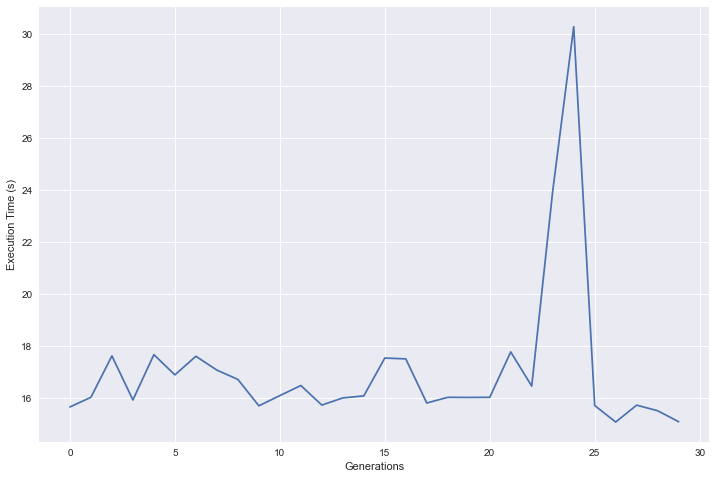

In [19]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

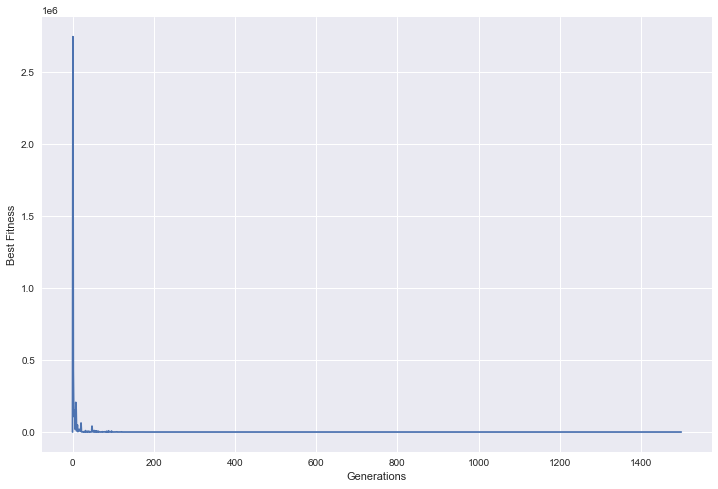

In [20]:
GENERATIONS = 1500
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,4))
model = ModelES(
    pop,
    Colville().compute,
    "uniform mutation",
    "mu,lambda",
    "random",
    2,
    300,
    40,
    10,
    GENERATIONS,
    UB,
    LB,
    0)
    
    
es_alg = ES(model)
es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [21]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [22]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 4.81787477389965e-26
Variance: 6.731406429553779e-50
Standard Deviation: 2.594495409430084e-25


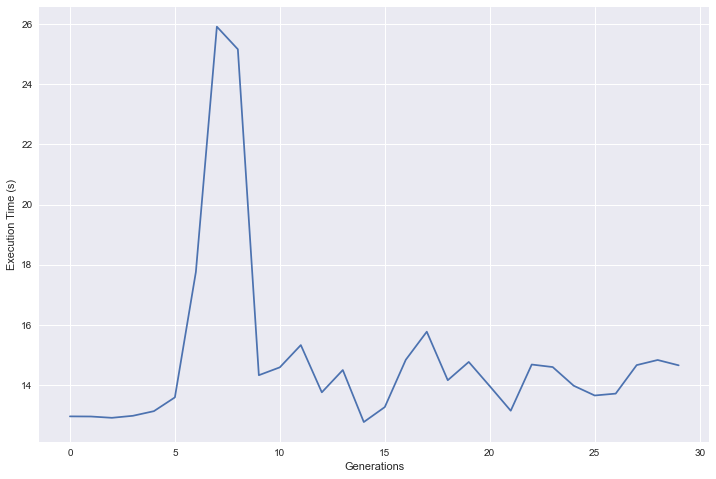

In [23]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()